## 5.Attempting to increase accuracy
 we seem to have reached a bottleneck accuracy of around 70%. we will attempt to explore means of improving the model's performance.

#### 5.1 using engineered feature

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Load the dataset
data = pd.read_csv("MyData.csv") 

# Drop the first column by index
data = data.drop(data.columns[0], axis=1)

# save the updated dataset back to a CSV file
data.to_csv("MyData_updated.csv", index=False)

# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

# Overview of the dataset
print("\nDataset Information:")
data.info()

print("\nStatistical Summary:")
display(data.describe())



First few rows of the dataset:


,hearing(left),Cholesterol,ALT,eyesight(left),waist(cm),hearing(right),dental caries,hemoglobin,weight(kg),serum creatinine,smoking
0,1,172,25,0.5,81.0,1,0,16.5,60,1.0,1
1,2,194,23,0.6,89.0,2,1,16.2,65,1.1,0
2,1,178,31,0.4,81.0,1,0,17.4,75,0.8,1
3,1,180,27,1.5,105.0,1,1,15.9,95,1.0,0
4,1,155,13,1.5,80.5,1,0,15.4,60,0.8,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hearing(left)     159256 non-null  int64  
 1   Cholesterol       159256 non-null  int64  
 2   ALT               159256 non-null  int64  
 3   eyesight(left)    159256 non-null  float64
 4   waist(cm)         159256 non-null  float64
 5   hearing(right)    159256 non-null  int64  
 6   dental caries     159256 non-null  int64  
 7   hemoglobin        159256 non-null  float64
 8   weight(kg)        159256 non-null  int64  
 9   serum creatinine  159256 non-null  float64
 10  smoking           159256 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 13.4 MB

Statistical Summary:


,hearing(left),Cholesterol,ALT,eyesight(left),waist(cm),hearing(right),dental caries,hemoglobin,weight(kg),serum creatinine,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,1.023974,195.796165,26.550296,1.005798,83.001990,1.023421,0.197996,14.796965,67.143662,0.892764,0.437365
std,0.152969,28.396959,17.753070,0.402113,8.957937,0.151238,0.398490,1.431213,12.586198,0.179346,0.496063
min,1.000000,77.000000,1.000000,0.100000,51.000000,1.000000,0.000000,4.900000,30.000000,0.100000,0.000000
25%,1.000000,175.000000,16.000000,0.800000,77.000000,1.000000,0.000000,13.800000,60.000000,0.800000,0.000000
50%,1.000000,196.000000,22.000000,1.000000,83.000000,1.000000,0.000000,15.000000,65.000000,0.900000,0.000000
75%,1.000000,217.000000,32.000000,1.200000,89.000000,1.000000,0.000000,15.800000,75.000000,1.000000,1.000000
max,2.000000,393.000000,2914.000000,9.900000,127.000000,2.000000,1.000000,21.000000,130.000000,9.900000,1.000000


In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

#Handle missing values:
data.fillna(data.median(), inplace=True)

#remove outliers using IQR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)] ## remvoe outliers

#scaling (Normalization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)




Missing Values in Each Column:
Series([], dtype: int64)


In [12]:
features =[ 'waist(cm)', 'hemoglobin', 'weight(kg)', 'serum creatinine','eyesight(left)','Cholesterol']

# Split the data into training and testing sets
X = df_scaled[features] 
y = df['smoking']

# Convert X and y to numpy arrays for clarity
X_scaled = np.array(X)
y = np.array(y)

# Engineered feature: Multiply features across columns for each sample
E_feature = X_scaled[:, 1] * X_scaled[:, 2] 

# Concatenate the engineered feature to the original features
E_X = np.column_stack((X_scaled, E_feature))  # Shape will now be (109386, 5)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(E_X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


trying to balance sample size in each class(undersampling majority class)

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Count the number of samples in each class
class_counts = np.unique(y_train, return_counts=True)
print("Class distribution in training data:")
for label, count in zip(class_counts[0], class_counts[1]):
    print(f"Class {label}: {count} samples")

# Identify the minority class and its sample count
minority_class = class_counts[0][np.argmin(class_counts[1])]
minority_count = np.min(class_counts[1])

# Separate samples based on class labels
minority_samples = X_train[y_train == minority_class]
majority_samples = X_train[y_train != minority_class]

# Create balanced training set
balanced_majority_samples = majority_samples[:minority_count]
X_train_balanced = np.vstack((minority_samples, balanced_majority_samples))
y_train_balanced = np.hstack((
    np.full(minority_count, minority_class),
    np.full(minority_count, 1 - minority_class)
))

# Shuffle the balanced training set
indices = np.arange(X_train_balanced.shape[0])
np.random.shuffle(indices)
X_train_balanced = X_train_balanced[indices]
y_train_balanced = y_train_balanced[indices]

print(f"Balanced training data size: {X_train_balanced.shape[0]} samples")


Class distribution in training data:
Class 0: 38378 samples
Class 1: 27253 samples
Balanced training data size: 54506 samples


In [19]:
# Count the number of samples in each class in the validation set
val_class_counts = np.unique(y_valid, return_counts=True)
print("Class distribution in validation data:")
for label, count in zip(val_class_counts[0], val_class_counts[1]):
    print(f"Class {label}: {count} samples")

# Identify the minority class and its sample count
val_minority_class = val_class_counts[0][np.argmin(val_class_counts[1])]
val_minority_count = np.min(val_class_counts[1])

# Separate samples based on class labels
val_minority_samples = X_valid[y_valid == val_minority_class]
val_majority_samples = X_valid[y_valid != val_minority_class]

# Create balanced validation set
balanced_val_majority_samples = val_majority_samples[:val_minority_count]
X_valid_balanced = np.vstack((val_minority_samples, balanced_val_majority_samples))
y_valid_balanced = np.hstack((
    np.full(val_minority_count, val_minority_class),
    np.full(val_minority_count, 1 - val_minority_class)
))

# Shuffle the balanced validation set
val_indices = np.arange(X_valid_balanced.shape[0])
np.random.shuffle(val_indices)
X_valid_balanced = X_valid_balanced[val_indices]
y_valid_balanced = y_valid_balanced[val_indices]

print(f"Balanced validation data size: {X_valid_balanced.shape[0]} samples")


Class distribution in validation data:
Class 0: 12793 samples
Class 1: 9084 samples
Balanced validation data size: 18168 samples


In [11]:


class RandomForest:
    def __init__(self, base_estimators=None, n_estimators=1000, max_features='sqrt', random_state=None):
        """
        Random Forest classifier that can use multiple base estimators.
        
        Parameters:
        - base_estimators: List of base models to use for ensemble (e.g., [DecisionTree, LogisticRegression]).
        - n_estimators: Total number of models to train.
        - max_features: The number of features to use for each model. Options: 'sqrt', 'log2', or an integer.
        - random_state: Random seed for reproducibility.
        """
        self.base_estimators = base_estimators or [DecisionTreeClassifier(random_state=random_state)]
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        """
        Train the RandomForest classifier using bootstrap sampling and feature selection.
        """
        np.random.seed(self.random_state)
        self.models = []
        
        n_samples, n_features = X.shape
        n_estimators_per_model = self.n_estimators // len(self.base_estimators)

        for base_estimator in self.base_estimators:
            for _ in range(n_estimators_per_model):
                # Bootstrap sampling
                indices = np.random.choice(n_samples, size=n_samples, replace=True)
                X_bootstrap = X[indices]
                y_bootstrap = y[indices]
                
               
                max_features = n_features

                features = np.random.choice(n_features, size=max_features, replace=False)
                X_bootstrap = X_bootstrap[:, features]
                
                # Train a model on the bootstrap sample with a random subset of features
                model = clone(base_estimator)
                model.fit(X_bootstrap, y_bootstrap)
                self.models.append((model, features))

    def predict(self, X):
        """
        Predict class labels using majority voting.
        """
        predictions = np.zeros((len(self.models), len(X)))
        for i, (model, features) in enumerate(self.models):
            X_subset = X[:, features]
            predictions[i, :] = model.predict(X_subset)
        
        # Majority vote (for classification)
        return np.round(np.mean(predictions, axis=0)).astype(int)


try training on balanced datasets

 we  need to study the number of estimators against error separately

In [15]:
# Initialize variables for the experiment
n_estimators_range = range(0, 1001, 500)  # Number of estimators from 10 to 1000, step 50
validation_errors = []


In [16]:
# Evaluate RandomForest with varying n_estimators
for n_estimators in n_estimators_range:
    rf = RandomForest(n_estimators=n_estimators, max_features=5, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_valid)
    validation_error = 1 - accuracy_score(y_valid, y_pred)
    validation_errors.append(validation_error)

d:\m_study\python\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\m_study\python\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Eslamia\AppData\Local\Temp\ipykernel_7324\908544345.py:56: RuntimeWarning: invalid value encountered in cast
  return np.round(np.mean(predictions, axis=0)).astype(int)


 now we plot the validation error against the number of estimators 

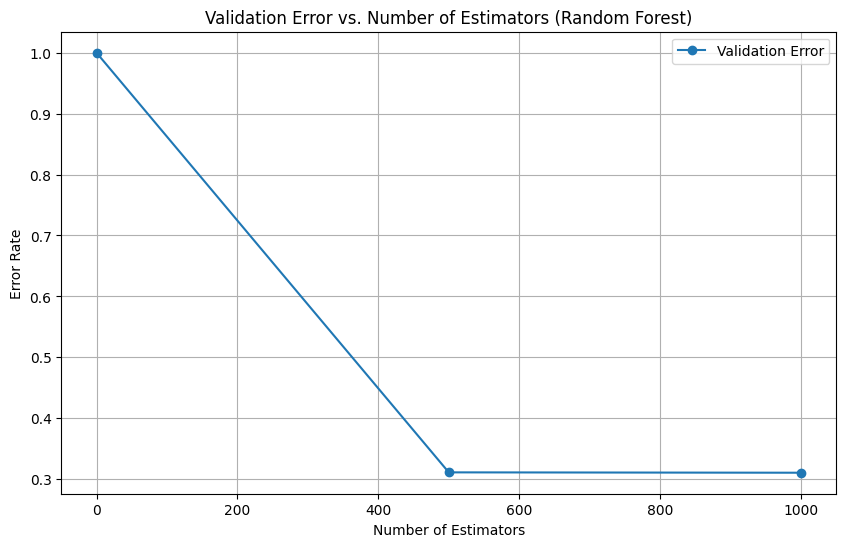

In [17]:
# Plot the validation error against the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, validation_errors, marker='o', label="Validation Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Error Rate")
plt.title("Validation Error vs. Number of Estimators (Random Forest)")
plt.legend()
plt.grid()
plt.show()

  increasing the number of estimators had no effect on error

In [20]:
best_estimators = [
    DecisionTreeClassifier(max_depth=3, random_state=42),
    #KNeighborsClassifier(n_neighbors=3)
]

X_combined = np.concatenate((X_train_balanced, X_valid_balanced), axis=0)
y_combined= np.concatenate((y_train_balanced,y_valid_balanced), axis=0)
    
    # Train the Random Forest ensemble
rf_model = RandomForest(base_estimators=best_estimators, n_estimators=150, random_state=42,  max_features=3)
rf_model.fit(X_combined, y_combined)

In [21]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7036749245817716


7ta balancing mnf3sh ..... mfish 7aga nf3t